In [1]:
import numpy as np
import os
import math 
import matplotlib.pyplot as plt

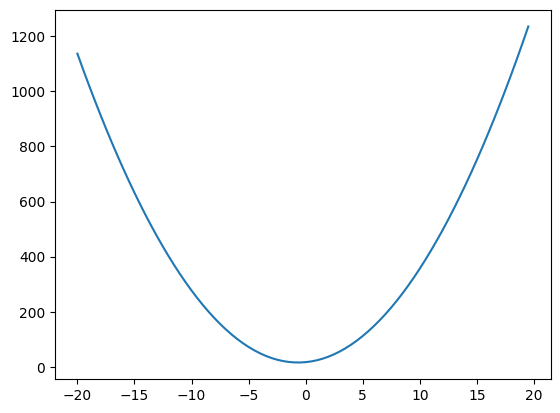

In [48]:
def func(x):
    """ Generates a polynomial on x. """
    return 3*(x**2) + 4*x + 17


x = np.arange(-20, 20, 0.5)
y = func(x)

plt.plot(x, y)


63.99970000018945


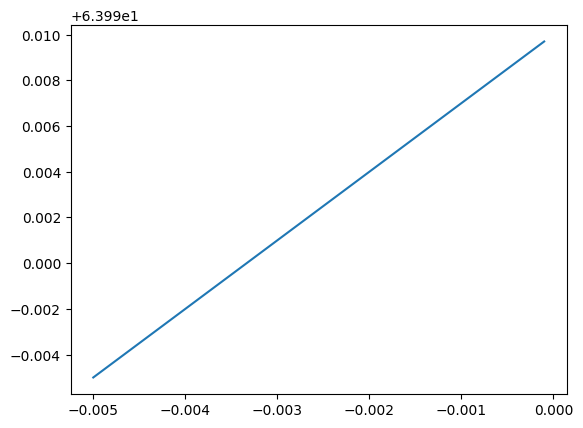

In [49]:
def derivative(function, x):
    """Computes first order derivative of a given function at a particular point."""
    deltas = np.arange(-0.0050, 0, 0.0001)
    derivatives = []
    for d in deltas:
        deriv = (function(x+d)-function(x))/d
        derivatives.append(deriv)
    plt.plot(deltas, derivatives)
    print(derivatives[-1])
        

derivative(func, 10)

In [50]:
x = np.array([65.348358])
type(x[0])

numpy.float64

In [51]:
class Value():
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self._children = set(_children)
        self._op = _op
        self.grad = 0
        self.label = label
    def __repr__(self):
        return f"Value({self.data})"
    def __add__(self, other):
        return Value(self.data + other.data, _children=(self, other), _op="+")
    def __mul__(self, other):
        return Value(self.data * other.data, _children=(self, other), _op="*")


a = Value(4, label="a")
b = Value(10, label="b")
c = Value(6, label="c")
d = a*b 
d.label = "d"
e = d + c
e.label = "e"

f = Value(4, label='f')
L = f*e; L.label = "L"

    

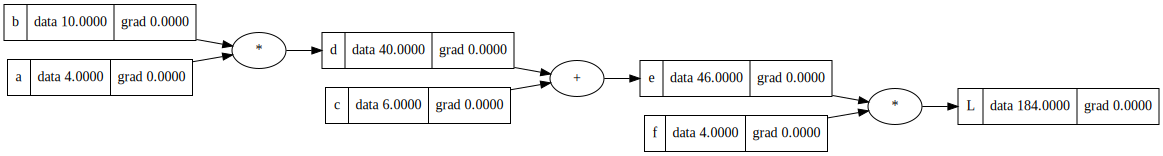

In [52]:
from graphviz import Digraph 

def build(root):
    edges, nodes = set(), set()
    def dfs(root):
        if root not in nodes:
            nodes.add(root)
            for child in root._children:
                edges.add((child, root))
                dfs(child)
    dfs(root)
    return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = build(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

draw_dot(L)

In [55]:
def lol():
    h = 0.0001
    a = Value(3)
    b = Value(5)
    c = a+b 
    d = Value(-4)
    e1 = c*d
    L1 = e1.data

    a = Value(3+h)
    b = Value(5)
    c = a+b 
    d = Value(-4)
    e2 = c*d
    L2 = e2.data

    print((L2-L1)/h)

lol()




-3.9999999999906777


In [ ]:
def Engine():
    return None